In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import files
uploaded = files.upload()

Saving HW3_img.jpeg to HW3_img (3).jpeg


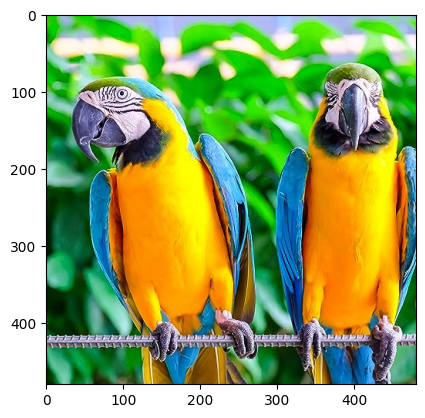

In [3]:
plt.imshow(cv2.imread("HW3_img.jpeg")[:,:,::-1])

In [4]:
bgr = cv2.imread("HW3_img.jpeg")

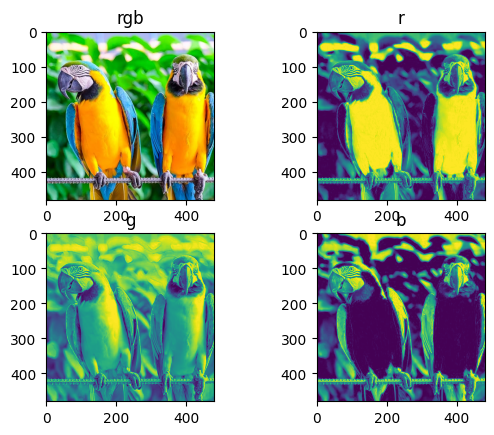

In [5]:
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
i = 0
lst = ["rgb", "r", "g", "b"]
plt.subplot(2, 2, i + 1)
plt.imshow(rgb[:, :, :])
plt.title(lst[i])

for j in range(1, 4):
    plt.subplot(2, 2, j + 1)
    plt.imshow(rgb[:, :, j - 1])
    plt.title(lst[j])

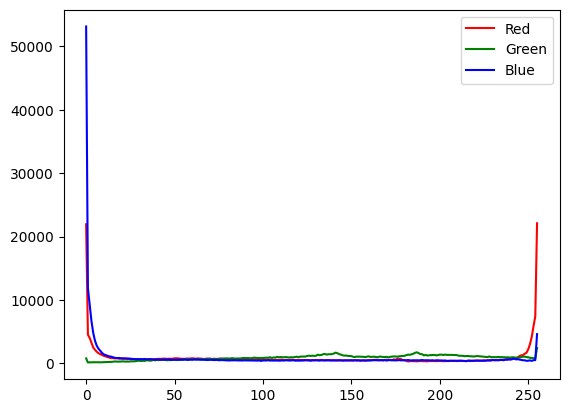

In [6]:
r, g, b = rgb[:, :, 0], rgb[:, :, 1], rgb[:, :, 2]
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
plt.plot(hist_r, color="r", label="Red")
plt.plot(hist_g, color="g", label="Green")
plt.plot(hist_b, color="b", label="Blue")
plt.legend()

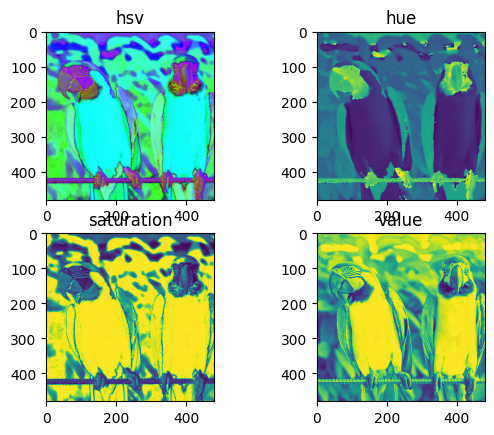

In [7]:
hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
i = 0
lst = ["hsv", "hue", "saturation", "value"]
plt.subplot(2, 2, i + 1)
plt.imshow(hsv[:, :, :])
plt.title(lst[i])

for j in range(1, 4):
    plt.subplot(2, 2, j + 1)
    plt.imshow(hsv[:, :, j - 1])
    plt.title(lst[j])

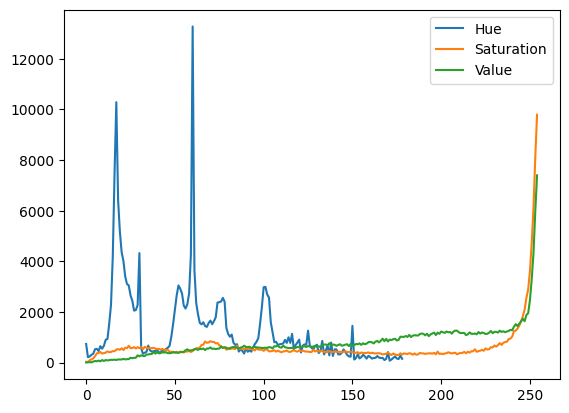

In [8]:
h, s, v = hsv[:, :, 0], hsv[:, :, 1], hsv[:, :, 2]
hist_h = cv2.calcHist([h], [0], None, [179], [0, 179])
hist_s = cv2.calcHist([s], [0], None, [255], [0, 255])
hist_v = cv2.calcHist([v], [0], None, [255], [0, 255])
plt.plot(hist_h, label="Hue")
plt.plot(hist_s, label="Saturation")
plt.plot(hist_v, label="Value")
plt.legend()

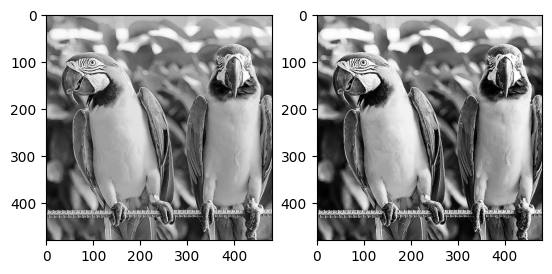

In [9]:
gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
gray_eq = cv2.equalizeHist(gray)
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(gray_eq, cmap=plt.cm.gray)

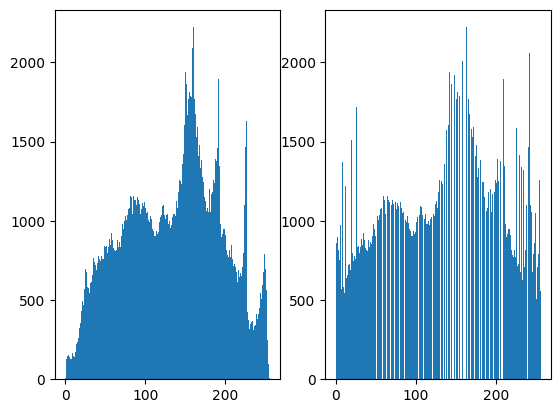

In [10]:
plt.subplot(1, 2, 1)
plt.hist(gray.ravel(),256,[0,256])
plt.subplot(1, 2, 2)
plt.hist(gray_eq.ravel(),256,[0,256]); plt.show()

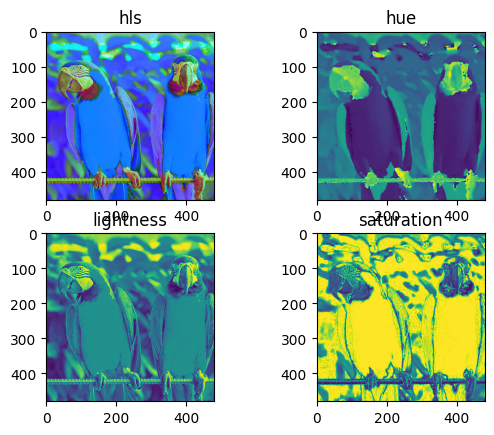

In [11]:
hls = cv2.cvtColor(bgr, cv2.COLOR_BGR2HLS)
i = 0
lst = ["hls", "hue", "lightness", "saturation"]
plt.subplot(2, 2, i + 1)
plt.imshow(hls[:, :, :])
plt.title(lst[i])

for j in range(1, 4):
    plt.subplot(2, 2, j + 1)
    plt.imshow(hls[:, :, j - 1])
    plt.title(lst[j])

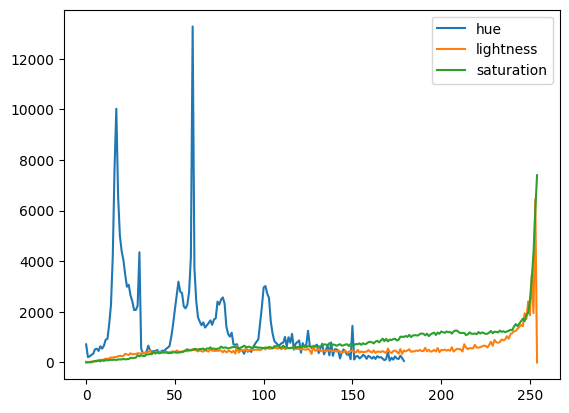

In [12]:
h, l, s = hls[:, :, 0], hls[:, :, 1], hls[:, :, 2]
hist_h = cv2.calcHist([h], [0], None, [180], [0, 180])
hist_l = cv2.calcHist([s], [0], None, [255], [0, 255])
hist_s = cv2.calcHist([v], [0], None, [255], [0, 255])
plt.plot(hist_h, label="hue")
plt.plot(hist_l, label="lightness")
plt.plot(hist_s, label="saturation")
plt.legend()

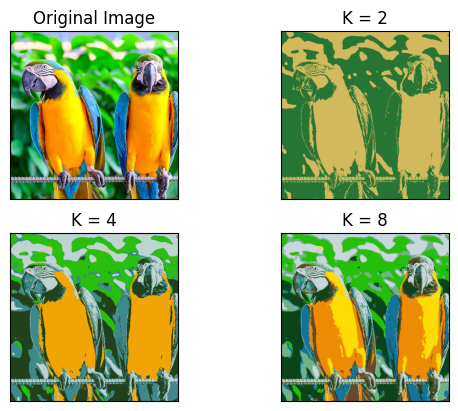

In [13]:
Z = bgr.reshape((-1, 3))
Z = np.float32(Z)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

def colorQuant(Z, K, criteria):
    ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((bgr.shape))
    return res2

res1 = colorQuant(Z, 2, criteria)
res2 = colorQuant(Z, 5, criteria)
res3 = colorQuant(Z, 8, criteria)

plt.subplot(2, 2, 1), plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))
plt.title("Original Image"), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 2), plt.imshow(cv2.cvtColor(res1, cv2.COLOR_BGR2RGB))
plt.title("K = 2"), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 3), plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))
plt.title("K = 4"), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 4), plt.imshow(cv2.cvtColor(res3, cv2.COLOR_BGR2RGB))
plt.title("K = 8"), plt.xticks([]), plt.yticks([])
plt.show()